## MovieLens Data Analysis
---

**Data Scientist Interview Challenge!**

- Exploratory Data Analysis to come up with 2 insights

---

**Going the extra mile!**

- Scraping IMDB to extract movie duration
- Singular Value Decomposition

In [2]:
# Prepare IPython Note for inline plots
%matplotlib inline

# Import necessary libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import sklearn.datasets


# Collaborative filtering using Pearson Correlation, cosine, manhattan and euclidean distance
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats.stats import pearsonr
from scipy import spatial

# Import library for web-scraping
import requests
from BeautifulSoup import BeautifulSoup

In [3]:
# Setting Matplotlib parameters
from matplotlib import rcParams

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

In [272]:
# Column Names for: u.data, u.user, u.item
print s_votes[2487]
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
item_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']                                                               

In [273]:
# Reading data files
ratings = pd.read_csv('u.data', sep = '\t', names = data_cols)
users = pd.read_csv('u.user', sep = '|', names = user_cols)
movies = pd.read_csv('u.item', sep = '|', names = item_cols)

In [6]:
ratings.head(3)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [7]:
users.head(3)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [8]:
movies.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,scifi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# Merging data: movies and ratings
movie_ratings = pd.merge(movies, ratings, on = 'movie_id', how = 'inner')
# Merging data: movie_ratings and user
movieLens = pd.merge(movie_ratings, users, on = 'user_id', how = 'inner')

In [11]:
movieLens.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,thriller,war,western,user_id,rating,timestamp,age,gender,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076


In [12]:
# Dimensions of movieLens
print movieLens.shape

(100000, 31)


In [13]:
# movieLens column names
print movieLens.columns.values

['movie_id' 'title' 'release_date' 'video_release_date' 'imdb_url'
 'unknown' 'action' 'adventure' 'animation' 'childrens' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'film_noir' 'horror' 'musical' 'mystery'
 'romance' 'scifi' 'thriller' 'war' 'western' 'user_id' 'rating'
 'timestamp' 'age' 'gender' 'occupation' 'zip_code']


In [14]:
# Change release_date from string to datetime
movieLens['release_date'] = pd.to_datetime(movieLens['release_date'])
print movieLens['release_date'].dtype

datetime64[ns]


In [15]:
# Get year from release date and get min and max year
movieLens['year'] = [t.year for t in movieLens['release_date']]
print np.min(movieLens['year'])
print np.max(movieLens['year'])

-1
1998


In [16]:
# Find all the records with year = -1
movieLens[movieLens['year'] == -1]

,movie_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,war,western,user_id,rating,timestamp,age,gender,occupation,zip_code,year
899,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,5,4,875635064,33,F,other,15213,-1
2092,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,268,3,875742077,24,M,engineer,19422,-1
11419,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,422,4,875655986,26,M,entertainment,94533,-1
20369,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,1,4,875692955,24,M,technician,85711,-1
23138,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,297,3,875409139,29,F,educator,98103,-1
27774,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,532,3,875441348,20,M,student,92705,-1
41706,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,130,5,875801239,20,M,none,60115,-1
78071,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,833,1,875655669,34,M,writer,90019,-1
99692,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,319,4,875707690,38,M,programmer,22030,-1


In [17]:
# Remove all the records with year = -1
movieLens = movieLens[movieLens['year'] != -1]
print movieLens.shape 
print '\n'
# Get min and max year
print np.min(movieLens['year'])
print np.max(movieLens['year'])

(99991, 32)


1922
1998


#### Exploratory Data Analysis

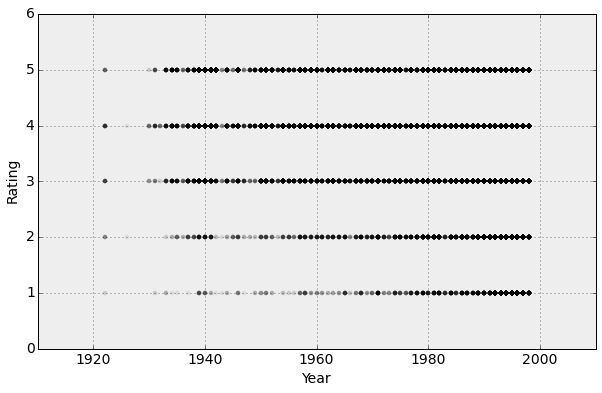

In [23]:
# Scatter plot year vs rating
plt.scatter(movieLens['year'], movieLens['rating'], lw=0, alpha=.08, color='k')
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()
# Does not provide much info

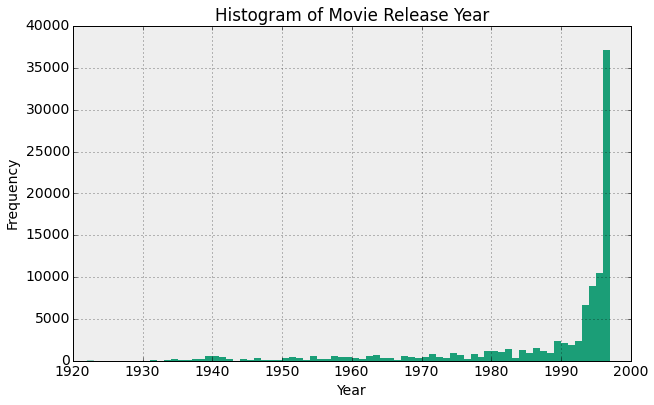

In [24]:
# Release year histogram
plt.hist(movieLens['year'], bins = np.arange(np.min(movieLens['year']), np.max(movieLens['year'])))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Release Year')
plt.show()
# Interesting observation: Most rated movies are the newer movies (95 to 98)
# Group by year and count

In [25]:
# Group movie by year: count ratings and mean rating for that year
movie_year = movieLens.groupby('year')
print movie_year['rating'].agg({'rating_count': np.size, 'rating_mean': np.mean}).tail(10)
# More ratings for movies released after 1991 (steep increase)

      rating_mean  rating_count
year                           
1989     3.716102          2360
1990     3.576482          2092
1991     3.765140          1899
1992     3.464764          2313
1993     3.524861          6657
1994     3.424716          8893
1995     3.366702         10499
1996     3.324538         19708
1997     3.375151         17393
1998     3.324924           991


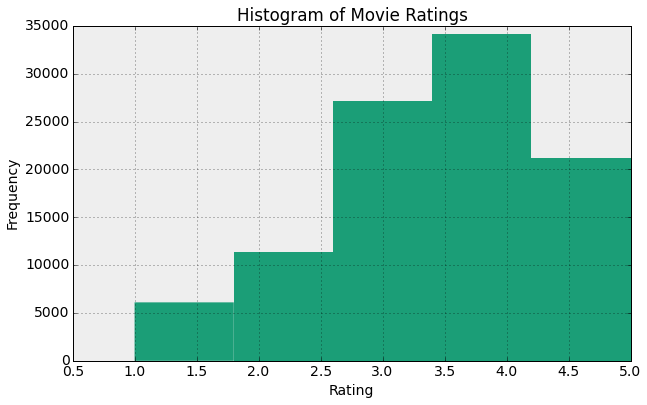

In [26]:
# Rating histogram
plt.hist(movieLens['rating'], bins = 5)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Movie Ratings")
plt.show()

In [27]:
# Min and Max user age
print np.min(users['age'])
print np.max(users['age'])

7
73


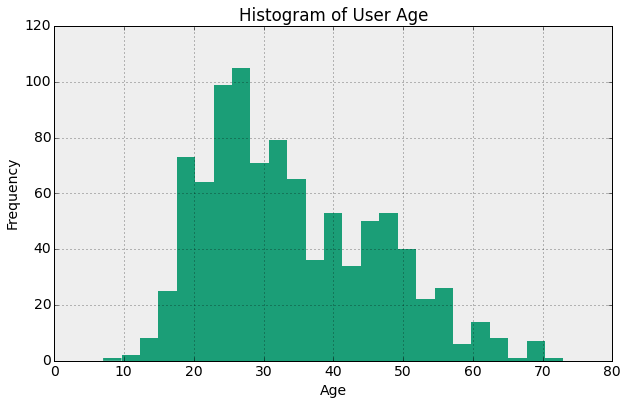

In [28]:
# Users age histogram
plt.hist(users['age'], bins = 25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of User Age')
plt.show()

In [29]:
# Movie ratings from user with age less than 10
print len(movieLens[movieLens['age'] < 10])
# 43 ratings were from user with age less than 10
print len(movieLens[movieLens['age'] >= 70])

43
197


In [30]:
print movies.shape
print '\n'
print users.shape
print '\n'
print ratings.shape

(1681, 24)


(943, 5)


(100000, 4)


In [31]:
# Binning users into age groups to get statistic
groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
movieLens['age_group'] = pd.cut(movieLens['age'], range(0, 81, 10), right = False, labels = groups)
print movieLens.groupby('age_group').agg({'rating': [np.size, np.mean, np.std]})
# pandas cut is pretty amazing! Thanks StackOverFlow

           rating                    
             size      mean       std
age_group                            
0-9            43  3.767442  0.996116
10-19        8181  3.486126  1.170631
20-29       39529  3.467302  1.154284
30-39       25693  3.554509  1.118763
40-49       15021  3.591772  1.091876
50-59        8704  3.635800  1.042335
60-69        2623  3.648875  1.006390
70-79         197  3.649746  1.075783


In [32]:
# Remove all the records with movie title  = unknown
movies = movies[movies['title'] != 'unknown']
movies.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,scifi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
# Get list of genre: From movies dataframe column names
print list(movies.columns.values[5:5+19])

['unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']


In [34]:
# What genres are the most frequent?
genre_list = list(movies.columns.values[5:5+19]) # There are 19 genres
genre_count = pd.DataFrame({'genre': genre_list})
temp = [];
for g in genre_list:
    temp.append(movies[g].sum())

genre_count['count'] = temp;
genre_count.sort(columns = 'count', ascending = False)

,genre,count
8,drama,725
5,comedy,505
1,action,251
16,thriller,251
14,romance,247
2,adventure,135
4,childrens,122
6,crime,109
15,scifi,101
11,horror,92


In [222]:
# Mean rating difference between male and female: Did they rate movies similarly?
mean_gender_rating = movieLens.pivot_table(rows = ['movie_id','title'], cols = 'gender', values = 'rating', aggfunc = 'mean', fill_value = 0)
mean_gender_rating['rating_diff'] = mean_gender_rating['M'] - mean_gender_rating['F']
#mean_gender_rating.sort(columns = 'rating_diff', ascending = True).head()
mean_gender_rating.reset_index('movie_id', inplace = True)
mean_gender_rating.head()

gender,movie_id,F,M,rating_diff
title,,,,
Toy Story (1995),1,3.789916,3.909910,0.119994
GoldenEye (1995),2,3.368421,3.178571,-0.189850
Four Rooms (1995),3,2.687500,3.108108,0.420608
Get Shorty (1995),4,3.400000,3.591463,0.191463
Copycat (1995),5,3.772727,3.140625,-0.632102


In [223]:
# Mean rating by user occupation
mean_occupation_rating = movieLens.pivot_table(rows = ['movie_id','title'], cols = 'occupation', values = 'rating', aggfunc = 'mean', fill_value = 0)
mean_occupation_rating.head()

,occupation,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
movie_id,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),4.000,4.083333,3.5,3.731707,4.043478,3.454545,3.882353,3.000000,4,4.166667,...,3.8,4.166667,4.039216,4.171429,3.666667,4.00,3.818182,3.790476,4.000000,3.562500
2,GoldenEye (1995),3.600,3.000000,0.0,3.333333,3.125000,3.500000,3.250000,2.666667,0,5.000000,...,3.0,4.500000,3.600000,3.176471,2.000000,0.00,3.000000,3.102564,2.714286,3.142857
3,Four Rooms (1995),3.000,0.000000,0.0,2.800000,3.363636,3.000000,2.000000,2.000000,0,0.000000,...,2.0,3.000000,3.333333,3.125000,0.000000,1.00,0.000000,3.121212,4.250000,1.500000
4,Get Shorty (1995),3.375,4.666667,3.0,3.368421,3.739130,4.000000,3.333333,3.000000,0,4.333333,...,3.5,3.500000,3.166667,3.650000,3.600000,3.75,3.666667,3.586957,3.250000,3.800000
5,Copycat (1995),3.000,0.000000,0.0,2.750000,3.000000,3.200000,4.500000,3.000000,0,3.000000,...,3.0,4.500000,3.636364,3.285714,3.500000,4.00,3.500000,3.315789,3.333333,2.857143


In [325]:
print 'Number of users who are artists: %d' %len(users[users['occupation'] == 'artist'])
print 'Number of users who are artists and older than 25: %d' %len(users[(users['occupation'] == 'artist') & (users['age'] > 25)])

Number of users who are artists: 28
Number of users who are artists and older than 25: 19


In [235]:
# 70 most rated movies
most_rated = movieLens.groupby('movie_id').size().order(ascending = False)[:70]
most_rated_index = most_rated.index

In [236]:
gender_rating_difference = mean_gender_rating[mean_gender_rating['movie_id'].isin(most_rated_index)]

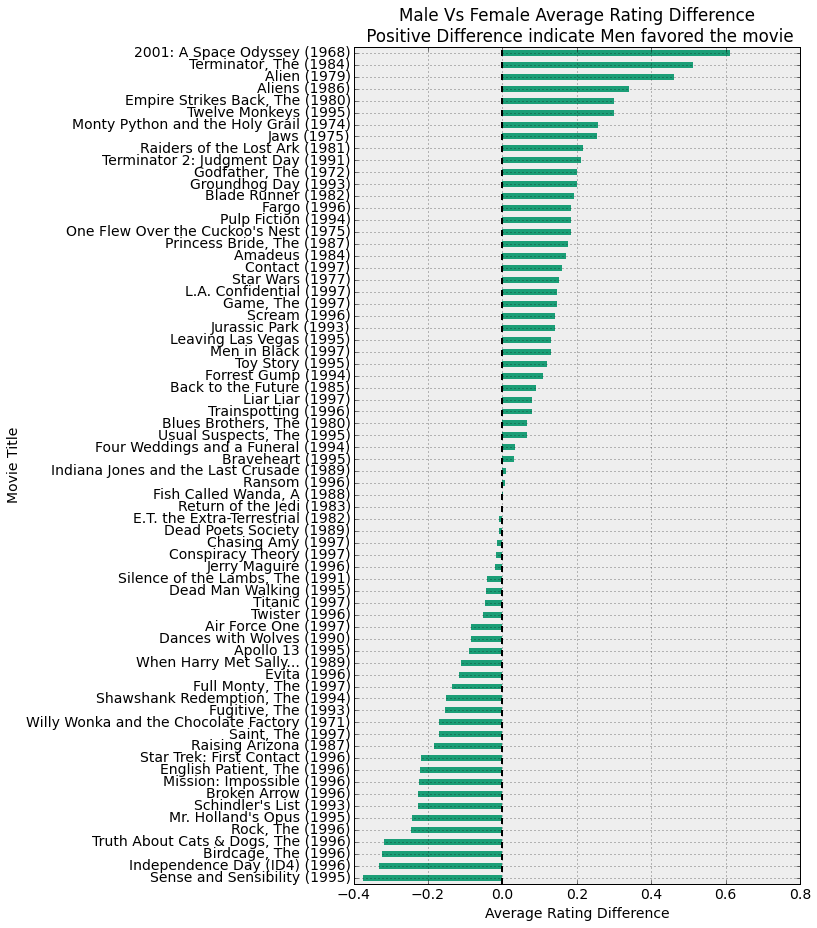

In [238]:
diff = gender_rating_difference['rating_diff'].order()
diff.plot(kind = 'barh', figsize = [8, 15])
plt.title('Male Vs Female Average Rating Difference \n Positive Difference indicate Men favored the movie')
plt.xlabel('Average Rating Difference')
plt.ylabel('Movie Title')

In [71]:
# Replace empty urls with imdb homepage url
movies['imdb_url'][1357] = 'http://www.imdb.com/'
movies['imdb_url'][1357] = 'http://www.imdb.com/'

In [37]:
# Internet connectivity issues: This is why I am scrapig movie duration in 3 steps
duration_1 = []
for i in movies['imdb_url'][:500]:
    url = i
    r = requests.get(url)
    bs = BeautifulSoup(r.text)
    if bs.find('time') is None:
        #continue
        duration_1.append('0')
    else:
        duration_1.append(bs.find('time').contents[0][17:20])
        
duration_2 = []
for i in movies['imdb_url'][500:1000]:
    url = i
    r = requests.get(url)
    bs = BeautifulSoup(r.text)
    if bs.find('time') is None:
        duration_2.append('0')
    else:
        duration_2.append(bs.find('time').contents[0][17:20])
        
duration_3 = []
for i in movies['imdb_url'][1000:]:
    url = i
    r = requests.get(url)
    bs = BeautifulSoup(r.text)
    if bs.find('time') is None:
        duration_3.append('0')
    else:
        duration_3.append(bs.find('time').contents[0][17:20])

In [91]:
# Convert string to integer
duration_1 = [int(i) for i in duration_1]
duration_2 = [int(i) for i in duration_2]
duration_3 = [int(i) for i in duration_3]

In [92]:
# Merge the duration lists
duration = duration_1 + duration_2 + duration_3
len(duration)

1681

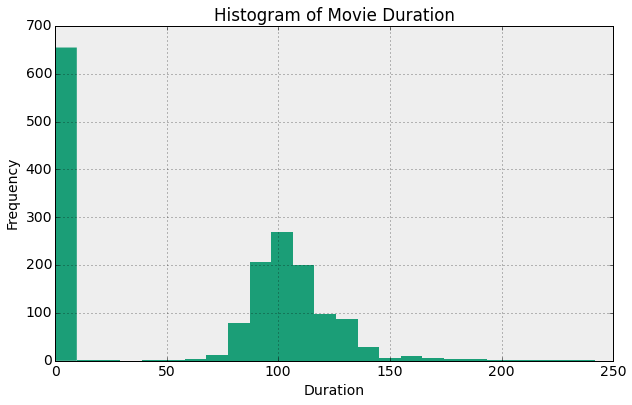

In [93]:
# Movie duration histogram
plt.hist(duration, bins = 25)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Duration')
plt.show()

In [256]:
# Singular Value Decomposition Matrix preparation
X = movieLens.pivot_table(rows = ['user_id'], cols = ['title'], values = 'rating', fill_value = 0)
X.head(3)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,2,5,0,0,3,4,0,0,...,0,0,0,0,5,3,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
Y = users['gender']

# Changing Gender from M/F to 1/0
for i,j in enumerate(Y):
    if j == 'M':
        Y[i] = 1
    else:
        Y[i] = 0

In [258]:
print X.shape
print Y.shape

(943, 1663)
(943,)


In [293]:
#Singular Value Decomposition
#U are the left singular vectors
#d are the singular values
#U*d gives PCA scores
#V are the right singular vectors 

U, d, V = scipy.linalg.svd(X, full_matrices = False)

In [329]:
# PCA scores
pca_scores = U*d
pca_scores.shape

(943, 943)

(-40, 15)

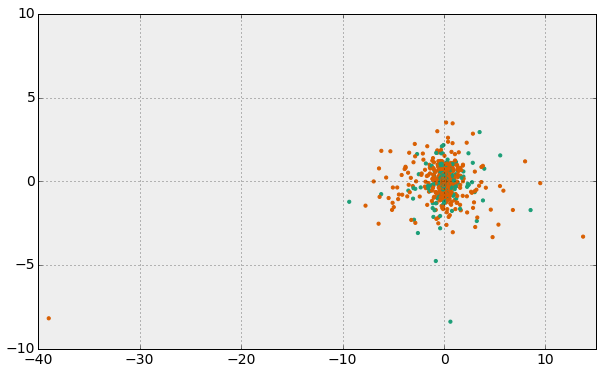

In [332]:
# Plotting PCA Scores for PC-1 and PC-2
colors = [dark2_colors[i] for i in Y]
plt.scatter(pca_scores[0],pca_scores[1], color = colors, s=10)
plt.ylim(-10,10)
plt.xlim(-40,15)

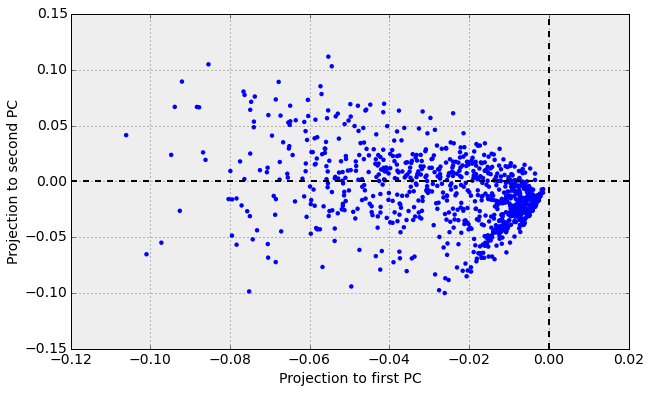

In [261]:
#Plot components of left singular vectors
plt.scatter(U.transpose()[0],U.transpose()[1])
plt.xlabel('Projection to first PC')
plt.ylabel('Projection to second PC')
plt.axvline(x=0, color = 'black', ls='--')
plt.axhline(y=0, color = 'black', ls='--')
plt.show()

In [262]:
#d^2 is proportional to the variance explained by the dimension
#For variance explained, normalize d^2

var_exp = d**2/sum(d**2)

print "The first principal component explains %0.2f%% of the variance."%(var_exp[0]*100)


The first principal component explains 29.97% of the variance.


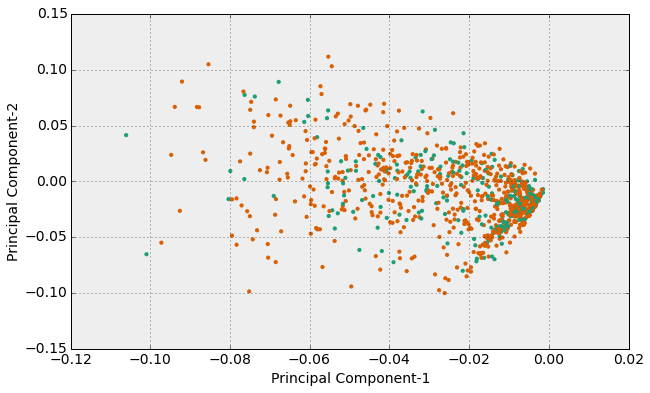

In [275]:
colors = [dark2_colors[i] for i in Y]
plt.scatter(U[:,0], U[:,1], color = colors, s=10)
x = np.array([-0.12, 0.02])
plt.xlabel("Principal Component-1")
plt.ylabel("Principal Component-2")
plt.ylim(-0.15,0.15)
plt.show()

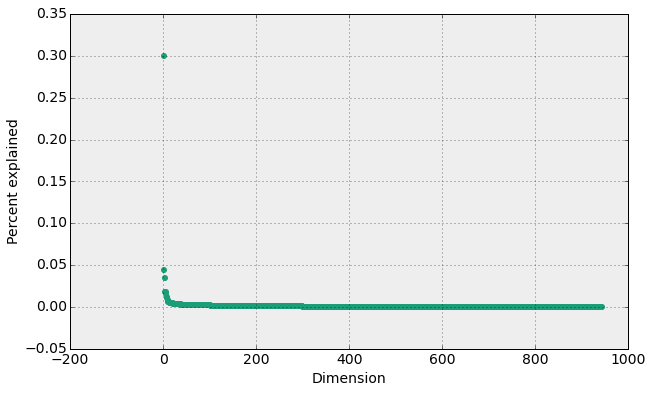

In [184]:
plt.scatter(range(1, 944), d**2/np.sum(d**2), s = 25, color = dark2_colors[0])
plt.xlabel("Dimension")
plt.ylabel("Percent explained")

In [327]:
print U.shape
print d.shape
print V.shape

(943, 943)
(943,)
(943, 1650)


In [ ]:
np.diagonal

In [292]:
# Variance Explained Principal Component-1 in Training sets: u1.base, u2.base, u3.base, u4.base, u5.base
explained_variance = []
for i,j in enumerate(range(1, 6)):
    fName = 'u'+ str(j) + '.base'
    train = pd.read_csv(fName, sep = '\t', names = data_cols)
    X = train.pivot_table(rows = ['user_id'], cols = ['movie_id'], values = 'rating', fill_value = 0)
    U, d, V = scipy.linalg.svd(X, full_matrices = False)
    var_exp = d**2/sum(d**2)
    explained_variance.append(var_exp[0]*100)
    print "The first principal component explains %0.2f%% of the variance in training set: %s." %(var_exp[0]*100, fName)

The first principal component explains 25.22% of the variance in training set: u1.base.
The first principal component explains 24.35% of the variance in training set: u2.base.
The first principal component explains 24.74% of the variance in training set: u3.base.
The first principal component explains 24.82% of the variance in training set: u4.base.
The first principal component explains 25.42% of the variance in training set: u5.base.


In [303]:
# KNN test
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, Y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [323]:
# PCA test
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.14571569  0.03969101]
